In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [6]:
botox = Table.read_table('bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [7]:
botox.pivot('Result', 'Group')

Group,0.0,1.0
Control,14,2
Treatment,6,9


In [8]:
botox.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [9]:
# Takes: name of table, column label of numerical variable,column label of group-label variable    
# Returns: Difference of means of the two groups
def difference_of_means(table, numeric_label, group_label):
    reduced_table = table.select(numeric_label, group_label)
    means_table = reduced_table.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1)-means.item(0)

In [10]:
difference_of_means(botox,'Result', 'Group' )

0.475

In [11]:
# Takes: name of table, column label of numerical variable,column label of group-label variable    
# Returns: Difference of means of the two groups after shuffling labels
def one_simulated_difference(table, numeric_label, group_label):
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    shuffled_table = table.select(numeric_label).with_column('Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')

In [12]:
one_simulated_difference(botox, 'Result', 'Group')

0.08750000000000002

## Testing of the Hypothesis

In [13]:
observed_diff = difference_of_means(botox, 'Result', 'Group')
observed_diff

0.475

In [14]:
one_simulated_difference(botox, 'Result', 'Group')

-0.041666666666666685

In [15]:
simulated_diffs = make_array()

for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

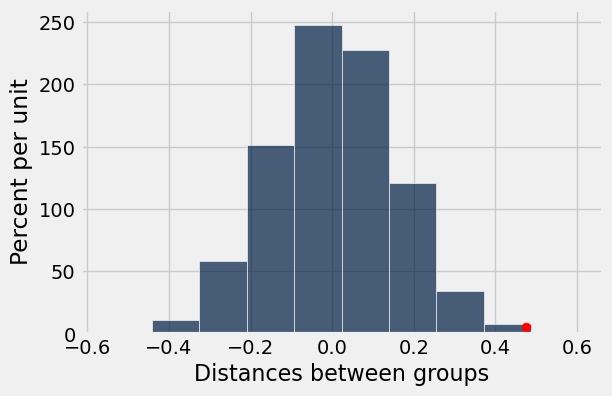

In [16]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
plots.scatter(observed_diff, 0.05, color='red', s=40);

In [33]:
np.count_nonzero(simulated_diffs >= observed_diff) /10000

0.0086